In [36]:
#importing the data
import numpy as np # Importing NumPy module and labeling as np
import pandas as pd # Importing Pandas module and labeling as pd
from scipy import stats
#from scipy.stats import t
df = pd.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294341-4390/yrbss-samp.csv")

df.head(100)

age  gender  grade  hispanic                       race  height  weight  \
0   16.0  female   11.0       not  Black or African American    1.50   52.62   
1   17.0    male   11.0       not                      White    1.78   74.84   
2   17.0    male   11.0       not                      White    1.75  106.60   
3   15.0    male   10.0  hispanic                        NaN    1.68   66.68   
4   18.0    male   12.0       not  Black or African American    1.70   80.29   
..   ...     ...    ...       ...                        ...     ...     ...   
95  17.0    male   11.0       not                      White    1.80   63.50   
96  16.0  female   10.0       not                      White    1.63   49.90   
97  15.0    male   10.0       not  Black or African American    1.78   79.38   
98  15.0    male    9.0       not                      White    1.68   58.97   
99  14.0    male    9.0       not                      White    1.70   55.79   

      helmet_12m text_while_driving_30d  physically_active_7d  \
0          never                    1-2                     0   
1         rarely                      0                     7   
2          never                      0                     7   
3          never          did not drive                     3   
4          never          did not drive                     0   
..           ...                    ...                   ...   
95        always                      0                     2   
96  did not ride                      0                     0   
97         never                      0                     6   
98         never                    1-2                     7   
99         never          did not drive                     1   

   hours_tv_per_school_day  strength_training_7d school_night_hours_sleep  
0                        4                     0                        8  
1                        1                     5                        7  
2                        2                     0                        7  
3                        2                     1                        5  
4                        2                     2                        6  
..                     ...                   ...                      ...  
95            do not watch                     0                        7  
96                       1                     0                        6  
97                       3                     5                        7  
98                      5+                     1                        6  
99                       3                     0                        9  

[100 rows x 13 columns]

In [37]:
new_df = df[['physically_active_7d', 'school_night_hours_sleep']]

# Rows with 'NA' cannot give valuable information, that is why I removed rows containing "NA" values.
df = new_df.dropna(how='any', axis=0)
df.head(100)

# Also, to make the evaluation more precise, i changes "<5" and "5+" values to 5, "<1" to 1, and "10+" tp 10. 
#df= df.replace('do not watch', 0)
df= df.replace('5+', 5)
df= df.replace('<5', 5)
df= df.replace('10+', 10)
df= df.replace('<1', 1)
# it is unknown what 5+ or 10+ mean. This change will affect the outcomes of mean, median, range, standard deviation and the shape of the figure(histogram). 
# mode is not likely to be affected, because these unsusual unswers are infrequeant. 
# I changed 4 answer types: 5+, <5, 10+, <1. The data has more 5+ and 10+ than <5 and <1. So, I assume that my outcome will be underestimated compared to the original one. 
# And my figure shape is likely to be less left scewed, because of lack of possible extreme numbers (5+, 10+).

# Convert 'physically_active_7d' to numeric (integers or floats)
df['physically_active_7d'] = pd.to_numeric(df['physically_active_7d'], errors='coerce')
df['school_night_hours_sleep'] = pd.to_numeric(df['school_night_hours_sleep'], errors='coerce')

# Filter based on the 'physically_active_7d' column
df_x_1 = df[df['physically_active_7d'] < 1] # variable of "physically_active_7d" that is equal to 0.
df_x_2 = df[df['physically_active_7d'] >= 1] # variable of "physically_active_7d" that is more than or equal to 1.

# shows the first 10 rows of data tables
print(df_x_1.head(10))
print() 
print(df_x_2.head(10))
print()
# lists creation 
df_y_1 = df_x_1['school_night_hours_sleep'].tolist()
df_y_2 = df_x_2['school_night_hours_sleep'].tolist()
df_x_1 = df_x_1['physically_active_7d'].tolist()
df_x_2 = df_x_2['physically_active_7d'].tolist()
n_i = len(df_x_1)
n_a = len(df_x_2)
print("df_y_1 = ", df_y_1)
print("df_y_2 = ", df_y_2)

print("count of inactive students = ", n_i)
print("count of active studnts = ", n_a)

    physically_active_7d  school_night_hours_sleep
0                      0                         8
4                      0                         6
16                     0                         5
20                     0                         6
25                     0                         5
30                     0                         9
34                     0                         8
59                     0                         7
62                     0                         9
66                     0                         5

    physically_active_7d  school_night_hours_sleep
1                      7                         7
2                      7                         7
3                      3                         5
5                      4                         5
6                      7                         7
7                      5                         7
8                      7                         7
9                      6      

In [4]:
# function for the mean 
def mean(data):
    N = len(data) # to find the lenght of the data
    sum = 0 # needed for calculathion of the sum
    for i in data: # takes each components of the data from i to N. (0 to N-1) 
        sum += i # adds each component of the 'sum', and when the loop ends gives the sum of all data components.
    return sum/N # returns the mean, which is Sum / number of components. 
# print(mean([2, 4, 6, 0, 3, 4])) 
# I used the print to check my code right after writing it  

In [5]:
# write your function for the median here
def median(data):
    data.sort() # uses built-in functions to sort the data. 
    N = len(data) # calculates the length of the data
    if len(data) % 2 == 0: #if the N is an even number, it means that the list has 2 components to find a mean of 
        median1 = data[N//2] # identifies the 1st 
        median2 = data[N//2 - 1] # and 2nd component 
        median = (median1 + median2)/2 #mean of those two, that will give the median of the data 
    else: 
        median = data[N//2] # if the N is not an even number, the median is data[N//2] 
    return median #returnes the median 
    
#lst_my = [2, 4, 5, 6, 0, 3]
#print(median(lst_my))
# I used the print to check my code right after writing it 

In [6]:
# Mode 
def Mode(data):
    # Check if the input list is empty, and if so, return an empty list
    if len(data) == 0:
        return []

    mode_count = {} #empty dictionary to store the count of each unique element
    max_count = 0 # Initialize a variable to keep track of the maximum count
    modes = [] # Initialize an empty list to store the modes found in the input list
    
    for i in data: #check each elemet in the data 
        if i in mode_count: # Check if the element exists in the mode_count dictionary
            mode_count[i] += 1 # If it is, add + 1
        else:
            
            mode_count[i] = 1 # If it's not, add it to the dictionary with a count of 1

        # if the count of one element mode [i] is greater than max_count, then give max_count the value of mode_count[i]
        if mode_count[i] > max_count:
            max_count = mode_count[i]

    # Iterate through the elements and their counts in the mode_count dictionary
    for key, count in mode_count.items():
        if count == max_count: # Check if the count = maximum count
            # If it does, add the element to the modes list
             modes.append(key)

    # Returns the modes as a list
    return modes

# Check
#print(Mode([1, 2, 2, 3, 4, 4, 4, 5])) #checks if it can show only one mode 
#print(Mode([1, 2, 2, 3, 4, 4])) # when the list has many modes 
#print(Mode([1, 2, 3, 4])) # if each element is uniqe 

In [7]:
# function for the range 
def range_data(data):
    min_value = None #introduces the min_value 
    max_value = None #introduces the max_value

    for i in data: # calls each element of the data 
        if max_value == None or i > max_value: #and checks if the element's value is more than the max_value
            max_value = i #if yes, then max_value gets new value. The process continues until the loop ends. 
        if min_value == None or i < min_value: #same logic is used for min_value 
            min_value = i 
            
    return max_value - min_value # returnes the range, which is max_value - min_value. 

# giving the dataset to check the code
#answer is 10-1= 9. 
#print(range_data([2, 4, 6, 1, 2, 7, 4, 8, 10]))

In [8]:
# write your function for the standard deviation here
def standard_deviation(data):
    Mean = mean(data) #calls the function to fins the mean of the data
    sumtotal = 0 #requiered for Sum.
    
    for x in data: # uses all elements of the data. 
        sumtotal = sumtotal + (x - Mean)**2 #recreated the summation of the formula E((x - Mean)**2)
        
    #it is sample standard deviation formula, that is why sumtotal/(len(data) -1)
    return (sumtotal/(len(data)-1))**0.5 #sqrt of sumtotal/(len(data)-1)

# Example usage:
#print(standard_deviation([2, 4, 6, 1]))

In [38]:
print(mean([2, 4, 6, 0, 3, 4]), "built in code:", np.mean([2, 4, 6, 0, 3, 4]))
print(median([2, 4, 5, 6, 0, 3]), "built in code:", np.median([2, 4, 5, 6, 0, 3]))
print(Mode([1, 2, 2, 3, 4, 4, 4, 5])) #checks if it can show only one mode 
print(Mode([1, 2, 2, 3, 4, 4])) # when the list has many modes 
print(Mode([1, 2, 3, 4])) # if each element is uniqe 
print(range_data([2, 4, 6, 1, 2, 7, 4, 8, 10]), "built in code:", np.ptp([2, 4, 6, 1, 2, 7, 4, 8, 10]))
print(standard_deviation([2, 4, 6, 1]), "built in code:", np.std([2, 4, 6, 1], ddof=1))


3.1666666666666665 built in code: 3.1666666666666665
3.5 built in code: 3.5
[4]
[2, 4]
[1, 2, 3, 4]
9 built in code: 9
2.217355782608345 built in code: 2.217355782608345


In [100]:
# call the functions and print the stats here
x_i = round(mean(df_y_1),2)
median_i = round(median(df_y_1),2)
mode_i = Mode(df_y_1)
range_i = round(range_data(df_y_1),2)
s_i = round(standard_deviation(df_y_1),2)

print()

print("mean of physically inactive subgroup = ", x_i)
print("median of physically inactive subgroup = ", median_i) 
print("mode of physically inactive subgroup = ", mode_i) 
print("range of physically inactive subgroup = ", range_i) 
print("ssample sd of physically inactive subgroup = ", s_i) 

print()
print()

x_a = round(mean(df_y_2),2)
median_a = round(median(df_y_2),2)
mode_a = Mode(df_y_2)
range_a = round(range_data(df_y_2),2)
s_a = round(standard_deviation(df_y_2),2)


print()

print("mean of physically active subgroup = ", x_a)
print("median of physically active subgroup = ", median_a)
print("mode of physically active subgroup = ", mode_a)
print("range of physically active subgroup = ", range_a)
print("sample sd of physically active subgroup = ", s_a)

print()

#print("Check: built in mean of physically active subgroup = ", np.mean(df_y_2))
#print("Check: median of physically active subgroup = ", np.median(df_y_2))
#print("Check: range of physically active subgroup = ", np.ptp(df_y_2)) 
#print("Check: sample sd of physically active subgroup = ", np.std(df_y_2))



mean of physically inactive subgroup =  6.69
median of physically inactive subgroup =  6.5
mode of physically inactive subgroup =  [5, 6]
range of physically inactive subgroup =  4
ssample sd of physically inactive subgroup =  1.4



mean of physically active subgroup =  7.04
median of physically active subgroup =  7
mode of physically active subgroup =  [7]
range of physically active subgroup =  5
sample sd of physically active subgroup =  1.29



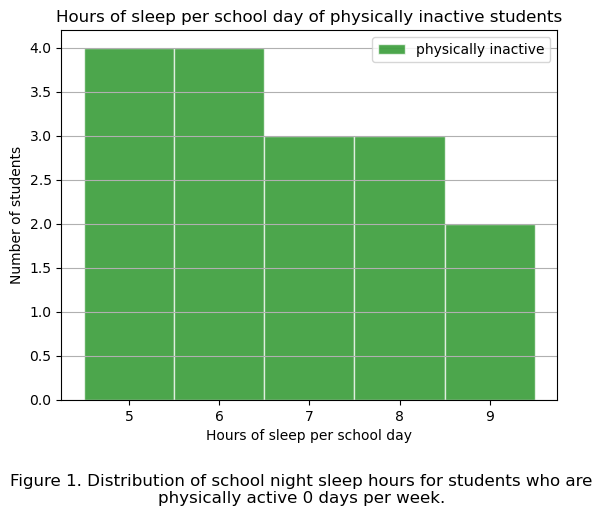

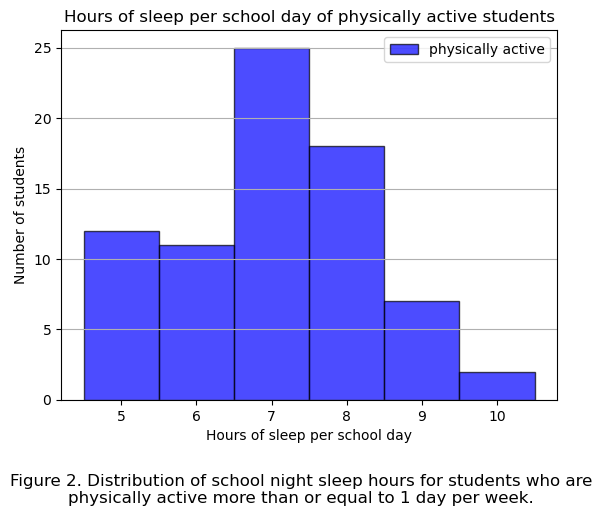

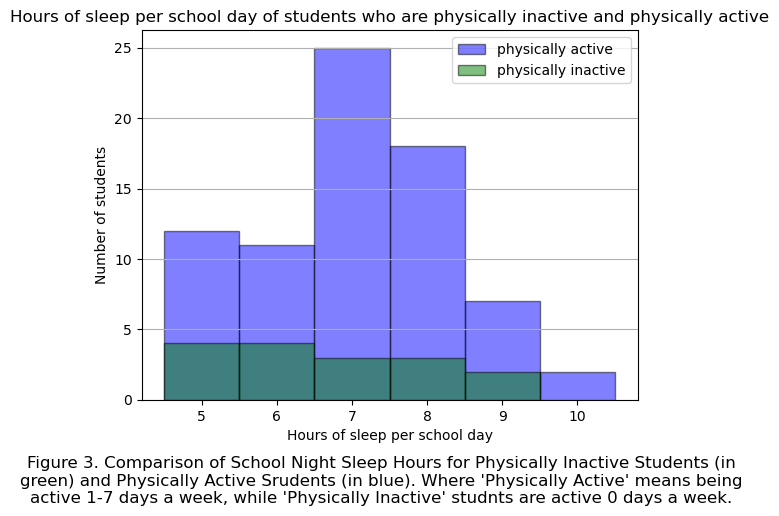

In [91]:
import pandas as pd  #library for data manipulation and analysis. It provides data structures like DataFrames.
import matplotlib.pyplot as plt  #library for creating static, interactive, and animated visualizations in Python.
%matplotlib inline  
# Magic command that makes matplotlib plots appear inline within the notebook.

# Histogram of physically inactive students' sleep hours
data_i = np.array(df_y_1)  # Convertes the df_y_1 data into a NumPy array for ease of manipulation

# Calculates the minimum bin width based on the unique values in the data
d_i = np.diff(np.unique(data_i)).min()
left_of_first_bin_i = data_i.min() - float(d_i)/2  # Calculates the left edge of the first bin
right_of_last_bin_i = data_i.max() + float(d_i)/2  # Calculates the right edge of the last bin
# Creates a histogram with specified bin edges, label, color, edge color, and transparency.
plt.hist(data_i, np.arange(left_of_first_bin_i, right_of_last_bin_i + d_i, d_i), label='physically inactive', color='green', edgecolor='white', alpha=0.7)
plt.title('Hours of sleep per school day of physically inactive students')  #title of the histogram
plt.xlabel('Hours of sleep per school day')  # x-axis label
plt.ylabel('Number of students')  # y-axis label
plt.legend(loc='upper right')  # puts the legend to the upper right corner of the plot
plt.grid(axis='y')  # Add horizontal gridlines 
#figure caption at the bottom of the plot
plt.figtext(0.5, -0.1, "Figure 1. Distribution of school night sleep hours for students who are physically active 0 days per week.", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()  

#similar steps are repeated for physically active students' sleep hours
data_a = np.array(df_y_2)  # Convertes df_y_2 data into a NumPy array.

# Calculates bin edges similar to the previous histogram
d_a = np.diff(np.unique(data_a)).min()
left_of_first_bin_a = data_a.min() - float(d_a)/2
right_of_last_bin_a = data_a.max() + float(d_a)/2
# Creates and displays the histogram for physically active students
plt.hist(data_a, np.arange(left_of_first_bin_a, right_of_last_bin_a + d_a, d_a), label='physically active', color='blue', edgecolor='black', alpha=0.7)
plt.title('Hours of sleep per school day of physically active students')
plt.xlabel('Hours of sleep per school day')
plt.ylabel('Number of students')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.figtext(0.5, -0.1, "Figure 2. Distribution of school night sleep hours for students who are physically active more than or equal to 1 day per week.", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
# Histogram comparing physically active and inactive students' sleep hours
plt.hist(data_a, np.arange(left_of_first_bin_a, right_of_last_bin_a + d_a, d_a), label='physically active', color='blue', edgecolor='black', alpha=0.5)
plt.hist(data_i, np.arange(left_of_first_bin_i, right_of_last_bin_i + d_i, d_i), label='physically inactive', color='green', edgecolor='black', alpha=0.5)

plt.title('Hours of sleep per school day of students who are physically inactive and physically active')
plt.xlabel('Hours of sleep per school day')
plt.ylabel('Number of students')
plt.legend(loc='upper right')
# Add gridlines to the plot
plt.grid(axis='y')
plt.figtext(0.5,-0.1,"Figure 3. Comparison of School Night Sleep Hours for Physically Inactive Students (in green) and Physically Active Srudents (in blue). Where 'Physically Active' means being active 1-7 days a week, while 'Physically Inactive' studnts are active 0 days a week.",wrap=True, horizontalalignment='center', fontsize=12) 
plt.show()

In [98]:
# Previously calculated statistics: sample sd (s_a and s_i), sample size(n_a and n_i), and mean(x_a and x_i)

# Difference of means T-score calculation
std_error_diff = np.sqrt((s_i**2 / n_i) + (s_a**2 / n_a))
t_score_diff = (x_a - x_i) / std_error_diff

# Degrees of freedom for the difference of means
df_diff = min(n_i - 1, n_a - 1)

# P-value for the difference of means
p_value_diff = 2 * stats.t.sf(np.abs(t_score_diff), df_diff)

# Confidence intervals for physically inactive and active studnts sleep hours per night 
confidence_level = 0.95
alpha = 1 - confidence_level
t_multiplier_i = stats.t.ppf(1 - alpha/2, n_i - 1)
t_multiplier_a = stats.t.ppf(1 - alpha/2, n_a - 1)

ci_i = (round(x_i - t_multiplier_i * s_i / np.sqrt(n_i), 2), round(x_i + t_multiplier_i * s_i / np.sqrt(n_i), 2))
ci_a = (round(x_a - t_multiplier_a * s_a / np.sqrt(n_a), 2), round(x_a + t_multiplier_a * s_a / np.sqrt(n_a), 2))

# Pooled standard deviation
pooled_sd = np.sqrt(((n_a - 1) * s_a**2 + (n_i - 1) * s_i**2) / (n_a + n_i - 2))

# Effect size (Cohen's d): means difference / pooled sd.
d = (x_a - x_i) / pooled_sd

print("t-score:", round(t_score_diff, 2))
print("degree of freedom:", df_diff)
print("p-value:", p_value_diff)
print("confidence interval of physically active people:",ci_a)
print("confidence interval of physically inactive people:",ci_i)
print("Pooled standard deviation:", round(pooled_sd, 2))
print("Cohen's d:", round(d, 2))

t-score: 0.92
degree of freedom: 15
p-value: 0.37206334558295917
confidence interval of physically active people: (6.74, 7.34)
confidence interval of physically inactive people: (5.94, 7.44)
Pooled standard deviation: 1.31
Cohen's d: 0.27
